Modelo SGDClassifier 
- LabelEncoder()
- StandardScaler()
- Variables: "OverTime", "JobLevel", "MaritalStatus", "YearsWithCurrManager","StockOptionLevel", "JobInvolvement", "JobSatisfaction", "EnvironmentSatisfaction"

In [1]:
# imports 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

from sklearn.preprocessing import LabelEncoder,StandardScaler




In [2]:
# Cargar los datos

data = pd.read_csv('../data/HR-Employee-Attrition.csv')

In [3]:
#Features & Target

X = data[[
    "OverTime", "JobLevel", "MaritalStatus", "YearsWithCurrManager",
    "StockOptionLevel", "JobInvolvement", "JobSatisfaction", "EnvironmentSatisfaction"
]].copy()                                              # Features
y = data['Attrition'].map({"Yes": 1, "No": 0})  # Target

In [4]:
# Encoding categorical variables

cat_cols = X.select_dtypes(include=['object']).columns
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le 

In [5]:
# Scaling 

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [6]:
# Create train and test (validation) samples

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}")

X_train: (1176, 8), X_test: (294, 8), y_train: (1176,), y_test: (294,)


In [7]:
# Create and train the model

model = SGDClassifier(loss = 'log_loss') 
hyperparameters = model.get_params()

print(type(model), '\n')
print('Model hyperparameters:', hyperparameters, '\n')

<class 'sklearn.linear_model._stochastic_gradient.SGDClassifier'> 

Model hyperparameters: {'alpha': 0.0001, 'average': False, 'class_weight': None, 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.0, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'optimal', 'loss': 'log_loss', 'max_iter': 1000, 'n_iter_no_change': 5, 'n_jobs': None, 'penalty': 'l2', 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False} 



In [8]:
model.fit(X_train, y_train)

print('Model:', model, '\n')
print('Model hyperparameters:', hyperparameters, '\n')

Model: SGDClassifier(loss='log_loss') 

Model hyperparameters: {'alpha': 0.0001, 'average': False, 'class_weight': None, 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.0, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'optimal', 'loss': 'log_loss', 'max_iter': 1000, 'n_iter_no_change': 5, 'n_jobs': None, 'penalty': 'l2', 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False} 



In [9]:
y_pred = model.predict(X_test)

print(type(y_pred))
y_pred

<class 'numpy.ndarray'>


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [10]:
# Visual analysis

check = pd.DataFrame({'Ground truth':y_test, 'Predictions':y_pred, 'Diff':y_test-y_pred})
check

,Ground truth,Predictions,Diff
1041,0,0,0
184,0,0,0
1222,1,0,1
67,0,0,0
220,0,0,0
...,...,...,...
567,0,0,0
560,0,0,0
945,0,0,0
522,0,0,0


In [11]:
#Modelo
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

txt = f"""
Accuracy: {accuracy:.4f}
Precision: {precision:.4f}
Recall: {recall:.4f}
F1 Score: {f1:.4f}
ROC AUC Score: {roc_auc:.4f}
"""
print(txt)


Accuracy: 0.8503
Precision: 0.3529
Recall: 0.1538
F1 Score: 0.2143
ROC AUC Score: 0.5554



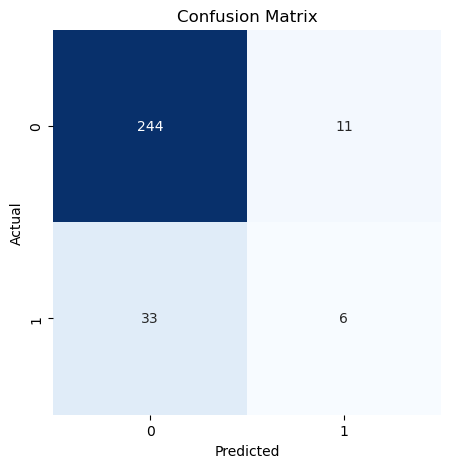

In [12]:
# Mtriz de confusión
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()
